In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
import warnings
warnings.filterwarnings("ignore")

In [188]:
df= pd.read_csv('modified_dataset.csv')
df.head()

,Unnamed: 0,Type,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,40061,city,0,6,2015,July,27,1,0,2,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,40062,city,1,88,2015,July,27,1,0,4,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,40063,city,1,65,2015,July,27,1,0,4,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,40064,city,1,92,2015,July,27,1,2,4,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,40065,city,1,100,2015,July,27,2,0,2,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [189]:
df = df.drop(['Unnamed: 0','Type'], axis=1)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [191]:
df.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79326.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,0.025615,0.079743,0.132371,0.187369,3.226774,105.304465,0.024367,0.546918
std,0.493111,110.948526,0.699181,13.398523,8.728451,0.885026,1.456416,0.509292,0.372177,0.084323,0.157983,0.415472,1.693411,0.608620,20.870890,43.602954,0.154919,0.780776
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.900000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,391.000000,5400.000000,3.000000,5.000000


In [192]:
df.shape

(79330, 31)

In [193]:
# Have an idea of what kind of data in each column
for x in df:
  print(df[x].unique())

[0 1]
[  6  88  65  92 100  79   3  63  62  43   4  97  80  60 106  68  18  71
  85  75  89  83  72 111  86  73  55  69  76  61  77  54  90 117 105  51
  24  84 115  67  87 109  96 114  66  59 122 123  94 120   0 125  82 107
 103  12 118 108 119  20  22  99 112  93 132 110   2  15  98 124  16  19
  81   5  27  25 126  74   1  64 138 102  78 130 135   7  28  34 141  33
 101  13  11  36 128  30 145 142  39 121 147 140 104  41 134 150   8 133
  10  40 131   9 137 127  46  47  14 151  17  44 113  53  50 162 148 149
  21  23  37  49  26  32  52 173  45 164  42  58  48 168  31  38 175 170
  29  35 167 166  56 152 155 116  95  57 179  70 192 169 193 199 204 200
  91 198 158 210 156 174 184 180 195 216 233 212 139 242 208 146 144 159
 197 129 160 154 393 251 157 161 136 182 267 274 268 190 281 188 275 270
 265 288 143 295 443 194 437 253 207 302 259 178 289 298 286 309 196 273
 276 297 191 451 217 323 316 189 322 211 163 172 153 205 202 330 177 220
 247 213 337 282 239 256 344 245 350 290 351 

In [194]:
for col in df.columns:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        #remove space in the object type column
        df[col] = df[col].str.strip()

In [195]:
missed_values= df.isnull().sum().sort_values(ascending = False)
missed_values

Country                        24
Children                        4
ReservationStatusDate           0
DistributionChannel             0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Babies                          0
Meal                            0
MarketSegment                   0
IsRepeatedGuest                 0
ReservationStatus               0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecial

In [196]:
df['Children'].unique()

array([ 0.,  1.,  2., nan,  3.])

In [197]:
# Removing NA from children 

df.dropna(axis= 0, inplace= True, subset= ['Children'])

In [198]:
df['Children'].unique()

array([0., 1., 2., 3.])

In [199]:
# Removing NA from country 

df.dropna(axis= 0, inplace= True, subset= ['Country'])

In [200]:
# Replacing NA with No agent

df['Agent'].replace(np.nan, 'No Agent', inplace= True)

In [201]:
print(missed_values.idxmax())
missed_values.max()

Country


24

In [202]:
# Replacing the missing values with mode

df['Children'].fillna(df['Children'].mode()[0], inplace=True)
df['Country'].fillna(df['Country'].mode()[0], inplace=True)

In [203]:
df.isnull().sum().sort_values(ascending= False)

ReservationStatusDate          0
DistributionChannel            0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
IsRepeatedGuest                0
ReservationStatus              0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
IsCanceled

In [204]:
df.to_csv('new_clean_data2.csv', encoding='utf-8', index=False)

In [205]:
df['Country'].value_counts()[:10]

PRT    30956
FRA     8804
DEU     6084
GBR     5315
ESP     4611
ITA     3307
BEL     1894
BRA     1794
USA     1618
NLD     1590
Name: Country, dtype: int64

In [206]:
Country_count = df['Country'].value_counts()
Country = list(Country_count.keys())
count = list(Country_count.values)

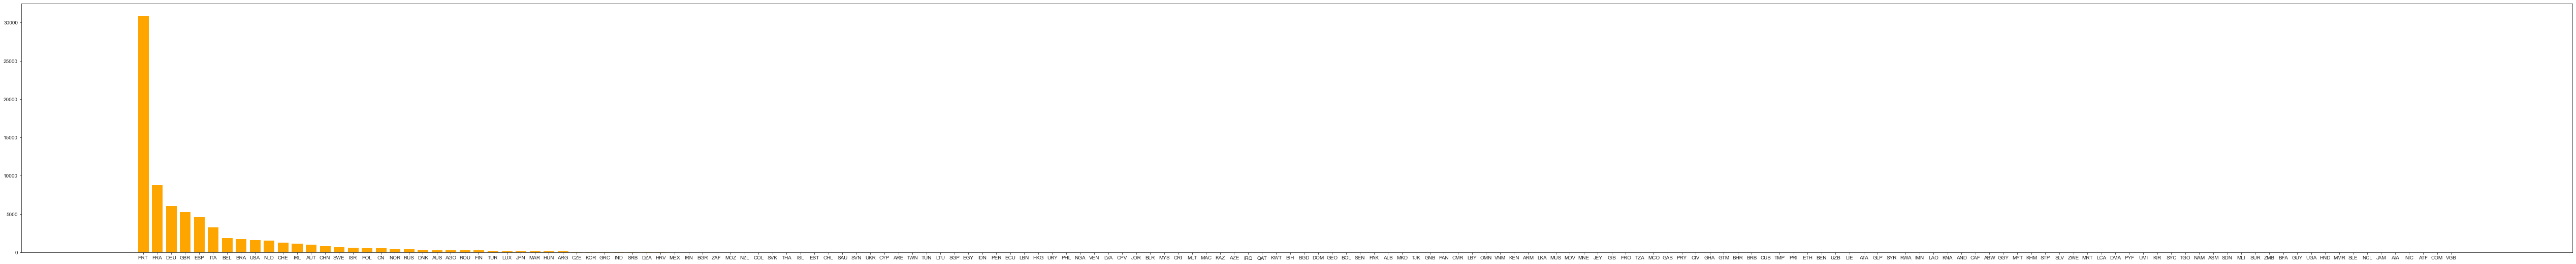

In [207]:
plt.figure(figsize=(90,9))
plt.bar(Country, count, color ='orange')
plt.show()

In [208]:
round(df['ADR'].mean(),2)

105.33

In [209]:
df['stay']= df['StaysInWeekendNights']+ df['StaysInWeekNights']
round(df['stay'].mean(),2)

2.98

<AxesSubplot:xlabel='ArrivalDateYear', ylabel='ArrivalDateMonth'>

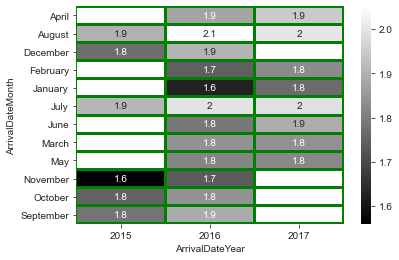

In [211]:
df['number of people']=df['Babies']+df['Adults']
fp=df.pivot_table(index='ArrivalDateMonth',columns='ArrivalDateYear',values='number of people')
sns.heatmap(fp,cmap='gray' ,linecolor='green',linewidth=2,annot=True)

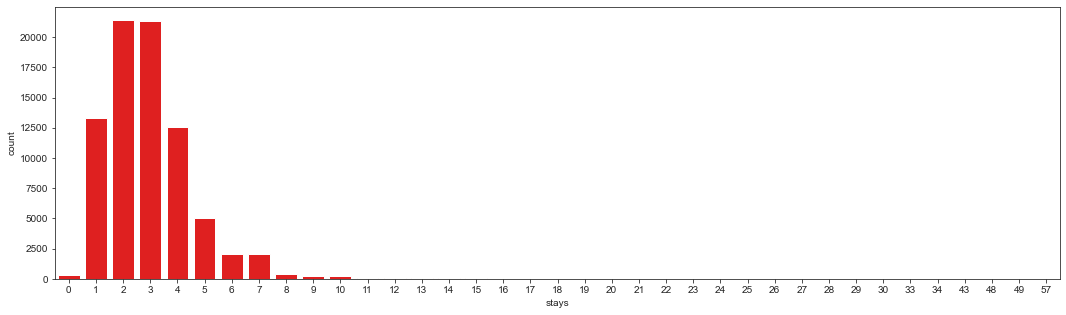

In [213]:
df['stays']= df['StaysInWeekendNights']+df['StaysInWeekNights']
plt.figure(figsize=(18,5))
sns.countplot(x=df['stays'], color='r')
plt.show()

([<matplotlib.patches.Wedge at 0x210001e9970>,
 [Text(-1.0628953077394, -0.2832906013011482, 'Not Canceled'),
  Text(1.0628953077394, 0.2832906013011485, 'Canceled')],
 [Text(-0.5797610769487637, -0.15452214616426263, '58.3%'),
  Text(0.5797610769487636, 0.1545221461642628, '41.7%')])

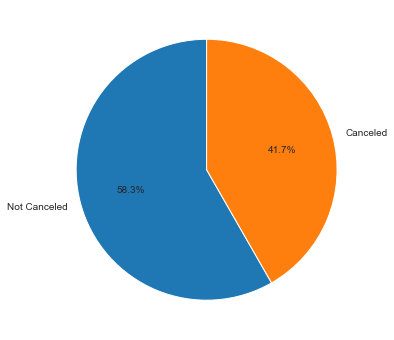

In [214]:
can_count= df['IsCanceled'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(can_count, labels=['Not Canceled', 'Canceled'], autopct='%.1f%%', startangle=90)

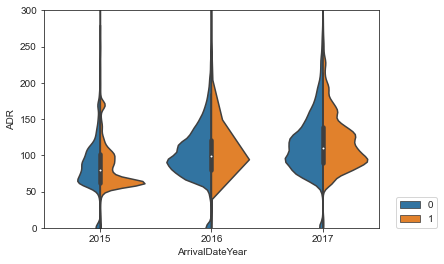

In [215]:
plt.ylim(0, 300)
sns.violinplot(data = df, x = 'ArrivalDateYear', y = 'ADR', hue = 'IsCanceled', split = True)
plt.legend(loc=(1.05, 0))

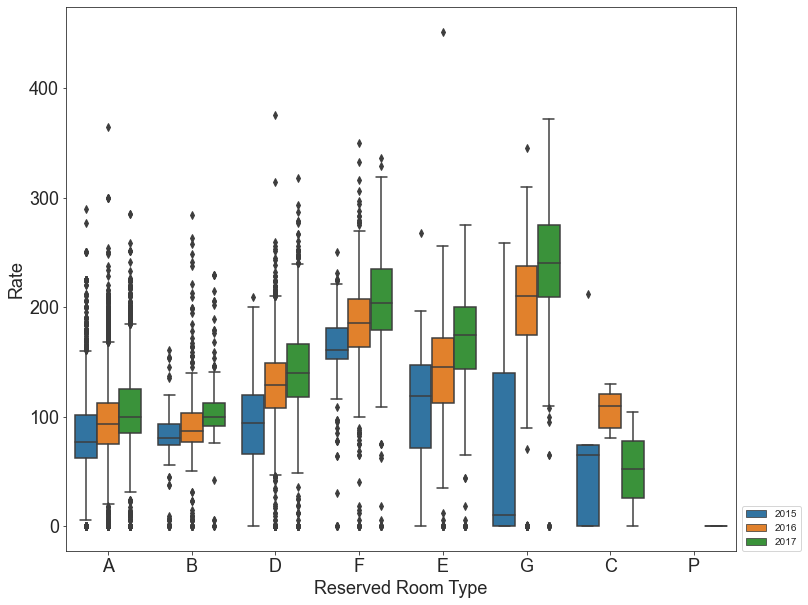

In [216]:
sns.set_style('ticks')
plt.figure(figsize=(12,10))
sns.boxplot(data = df[df['ADR']<500], x = 'ReservedRoomType', y = 'ADR', hue ='ArrivalDateYear', width = 0.8)
plt.xlabel("Reserved Room Type", fontsize = 18)
plt.xticks(fontsize=18)
plt.ylabel("Rate", fontsize = 18)
plt.yticks(fontsize=18)
plt.legend(loc=(1.01, 0))

<AxesSubplot:xlabel='ArrivalDateMonth', ylabel='ArrivalDateDayOfMonth'>

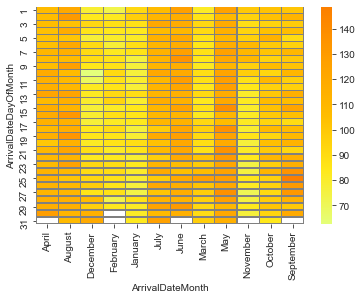

In [217]:
pivot_plot = df.pivot_table(index = 'ArrivalDateDayOfMonth', columns = 'ArrivalDateMonth', values = 'ADR')
sns.heatmap(pivot_plot, cmap='Wistia', linecolor='grey', linewidths=.2)

<AxesSubplot:>

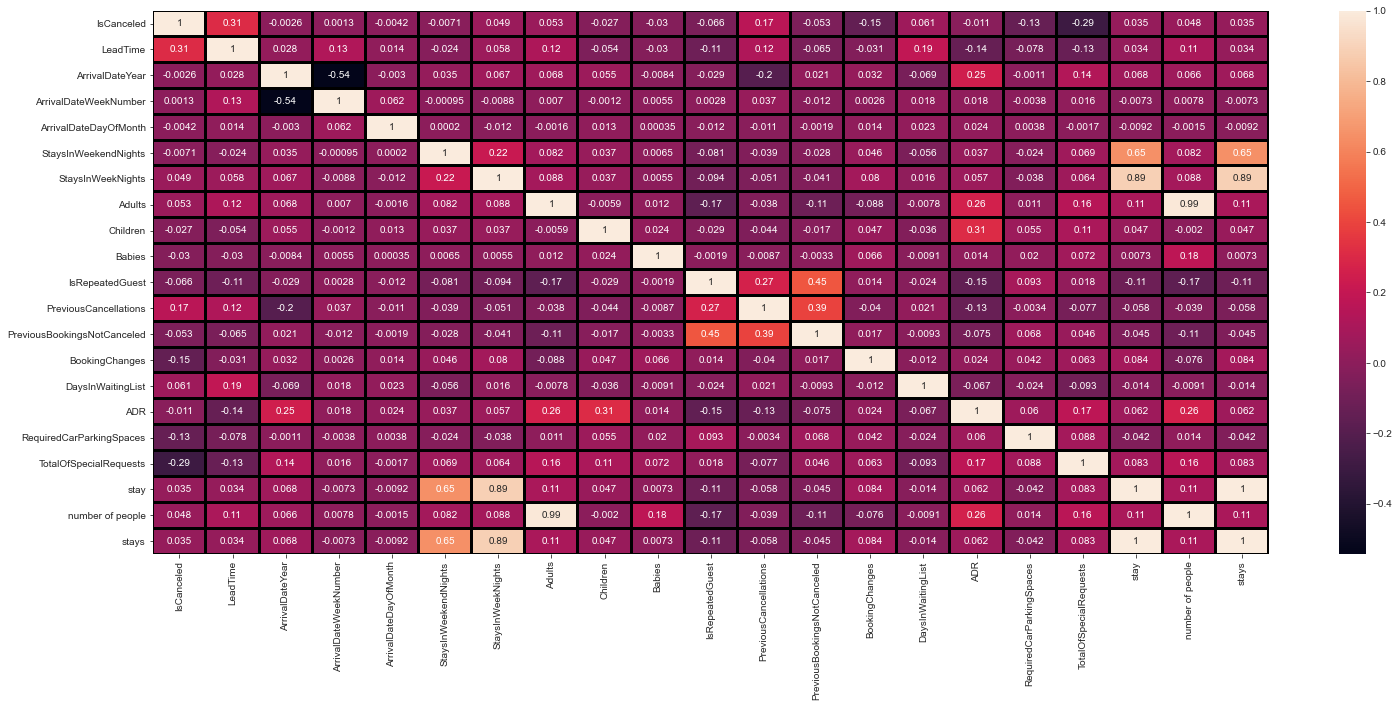

In [218]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=2)

# DATA SPLITTING

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X = df[['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber','StaysInWeekNights', 
                   'PreviousCancellations','PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
                    'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
                  ]]

y =  df['IsCanceled']

In [221]:
# Data splitting to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Logistic Regression

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression(solver='liblinear')

In [223]:
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [226]:
## (b) Accuracy
test_score = logreg.score(X_test, y_test)

print("Accuracy of test is:", test_score)
print("Accuracy of training is:", logreg.score(X_train, y_train))

# Get it manually - for test set

y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)

accuracy_manual_test = np.sum(y_test_pred == y_test)/y_test.shape[0]
print('Test acc.', accuracy_manual_test )

np.sum(y_train_pred == y_train)/y_train.shape[0]

Accuracy of test is: 0.7342272287839939
Accuracy of training is: 0.7325394966763344
Test acc. 0.7342272287839939


0.7325394966763344

In [227]:
logreg.coef_

array([[ 5.42959534e-03, -5.77545284e-04, -9.56016815e-03,
         9.85882593e-02,  2.60274379e+00, -8.24401957e-01,
        -7.27167474e-01, -1.56476967e-03,  7.00952923e-03,
        -2.76876774e+00, -8.82208704e-01]])

              precision    recall  f1-score   support

           0       0.58      0.66      0.62     13910
           1       0.42      0.34      0.38      9881

    accuracy                           0.53     23791
   macro avg       0.50      0.50      0.50     23791
weighted avg       0.51      0.53      0.52     23791


confusion matrix:

[[9152 4758]
 [6502 3379]]


<AxesSubplot:>

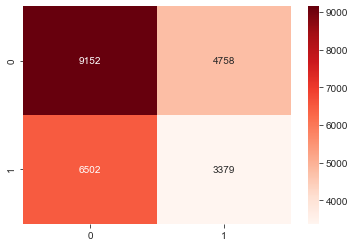

In [228]:
print(classification_report(y_test,logregpredict))
print('\n' + 'confusion matrix:' + '\n')
print(confusion_matrix(y_test,logregpredict))
sns.heatmap(confusion_matrix(y_test,logregpredict),annot=True, fmt='g',cmap='Reds')

In [229]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.722375
Recall score: 0.5848598320008096
Accuracy score: 0.7342272287839939
F1 score: 0.6463844304009843


In [230]:
# logreg.predict_proba(X_test)[:,1]

proba = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Precision')

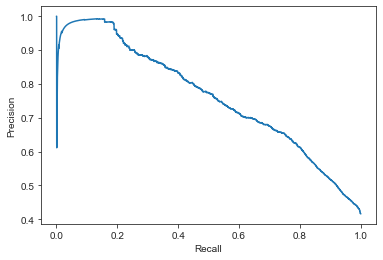

In [231]:

from sklearn.metrics import precision_recall_curve

# S1. Get probability
proba = logreg.predict_proba(X_test)[:, 1]

# S2. Collect Necessary Measures - three outputs
precision, recall, threshold = precision_recall_curve(y_test, proba)

# S3. Plot Figure
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [232]:
from sklearn.metrics import roc_auc_score

# we have obtained the predicted probability in the previous step: proba

print("AUC for logistic regression:", roc_auc_score(y_test, proba))

AUC for logistic regression: 0.7977430342717446


Text(0, 0.5, 'TPR')

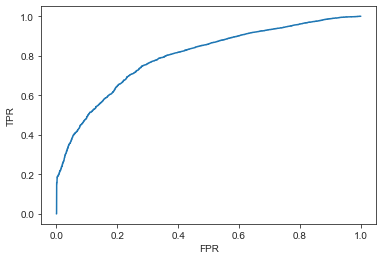

In [233]:
from sklearn.metrics import roc_curve
# Predicted Probability: proba
# Get Measures
fpr, tpr, threshold = roc_curve(y_test, proba)
# Generate Figure
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

# KNN

In [234]:
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train, y_train)


KNeighborsClassifier()

In [235]:
knnpred = knn5.predict(X_test)

KNN

              precision    recall  f1-score   support

           0       0.79      0.84      0.81     13910
           1       0.75      0.68      0.71      9881

    accuracy                           0.77     23791
   macro avg       0.77      0.76      0.76     23791
weighted avg       0.77      0.77      0.77     23791


confusion matrix
[[11661  2249]
 [ 3152  6729]]


<AxesSubplot:>

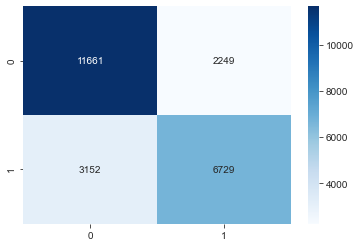

In [236]:
print('KNN' + '\n')
print(classification_report(y_test,knnpred))
print('\n' + 'confusion matrix')
print(confusion_matrix(y_test,knnpred))
sns.heatmap(confusion_matrix(y_test,knnpred),annot=True, fmt='g',cmap='Blues')

In [237]:
knn5.score(X_test, y_test)

0.7729813795132613

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define function
knn = KNeighborsClassifier()

# define a list of parameters: odd numbers between 3 and 25 inclusive
param_knn = {'n_neighbors': range(3, 26, 2)}  

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv = 5)
grid_knn.fit(X_train, y_train)

# the best hyperparameter chosen:
print(grid_knn.best_params_)

# When k=25 (best case), the validation score of through CV is:
print(grid_knn.best_score_)

{'n_neighbors': 3}
0.7692709280729355
